# **TELCO CUSTOMER CHURN**
----------------------


# Introduction

**Background**

ConnectTel is a leading telecommunications company that has been providing cutting-edge services to its diverse customer base. In an ever-evolving industry, customer retention is a key focus for ConnectTel to sustain its market position. Understanding and predicting customer churn has become a vital aspect of their business strategy.

Customer churn occurs when subscribers discontinue using ConnectTel's services. To quantify this, ConnectTel calculates its churn rate by dividing the number of lost customers during a specific period (e.g., a quarter) by the total number of customers at the beginning of that period. This metric helps the company assess the health of its customer base and strategize on measures to minimize churn.


**Problem Statement**

In the rapidly evolving telecommunications industry, ConnectTel is confronted with the critical challenge of customer churn, where subscribers opt to discontinue their services. To maintain its leadership and navigate market dynamics successfully, ConnectTel recognizes the paramount importance of customer retention as a core element of its business strategy.


**Objective**

ConnectTel aims to harness the power of machine learning to develop a predictive model capable of identifying potential customer churn. The primary focus is on avoiding misidentification, ensuring that customers with a propensity to churn are accurately identified as such and not incorrectly labeled as non-churn customers.

**Dataset**

Kaggle - Telco Customer Churn

https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

- `customerID` - Customer ID

- `gender` - Whether the customer is a male or a female

- `SeniorCitizen` - Whether the customer is a senior citizen (1, 0)

- `Partner` - Whether the customer has a partner (Yes, No)

- `Dependents` - Whether the customer has dependents (Yes, No)

- `tenure` - Number of months the customer has stayed with the company

- `PhoneService` - Whether the customer has a phone service (Yes, No)

- `MultipleLines` - Whether the customer has multiple lines (Yes, No, No phone service)

- `InternetService` - Customer’s internet service provider (DSL, Fiber optic, No)

- `OnlineSecurity` - Whether the customer has online security (Yes, No, No internet service)

- `OnlineBackup` - Whether the customer has online backup or not (Yes, No, No internet service)

- `DeviceProtection` - Whether the customer has device protection (Yes, No, No internet service)

- `TechSupport` - Whether the customer has tech support (Yes, No, No internet service)

- `StreamingTV` - Whether the customer has streaming TV service (Yes, No, No internet service)

- `StreamingMovies` - Whether the customer has streaming movies service (Yes, No, No internet service)

- `Contract` - Indicates the type of the contract (Month-to-month, One year, Two year)

- `PaperlessBilling` - Whether the customer has paperless billing (Yes, No)

- `PaymentMethod` - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

- `MonthlyCharges` - Indicates the current monthly subscription cost of the customer

- `TotalCharges` - Indicates the total charges paid by the customer so far

- `Churn` - Indicates whether the customer churned

# Import Libraries

In [474]:
!pip install feature_engine

In [475]:
# import the required libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from scipy.stats import chi2_contingency, kendalltau, stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from scipy.stats import pearsonr, spearmanr, kendalltau


# data imbalance
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

# modelling
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# evaluating
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score, make_scorer

# pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# saving model
import pickle
import warnings
warnings.filterwarnings('ignore')


# Data Loading

In [476]:
# read data csv
df=pd.read_csv('telco-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [477]:
# show columns name
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [478]:
# summary data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*   Dataset has 7043 rows with 21 columns
*   Consists of 1 columns of floats, 2 columns of integers and 18 columns of objects
*   There are no missing value
*   The `TotalCharges` column should be an integer, so further analysis will be carried out and the data type will be changed.



## Check Duplicate Data

In [479]:
# calculate duplicate
df.duplicated().sum()

0

No duplicate data

## Check Missing Value

In [480]:
# calculate null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Based on the information above there are no missing values

In [481]:
# change TotalCharges type to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# calculate missing value again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In the previous examination, NaN data was not detected because it was an object. There are 11 rows of NaN data in `TotalCharges`

In [482]:
# show row that contains missing values
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We observe that when tenure is equal to 0, the total charges value is set to null, as there haven't been any charges paid yet. In this case, the null value will be replaced with the value 0

In [483]:
# replace null value to 0
df.fillna(0,inplace=True)

# EDA

## **How many customers churn?**

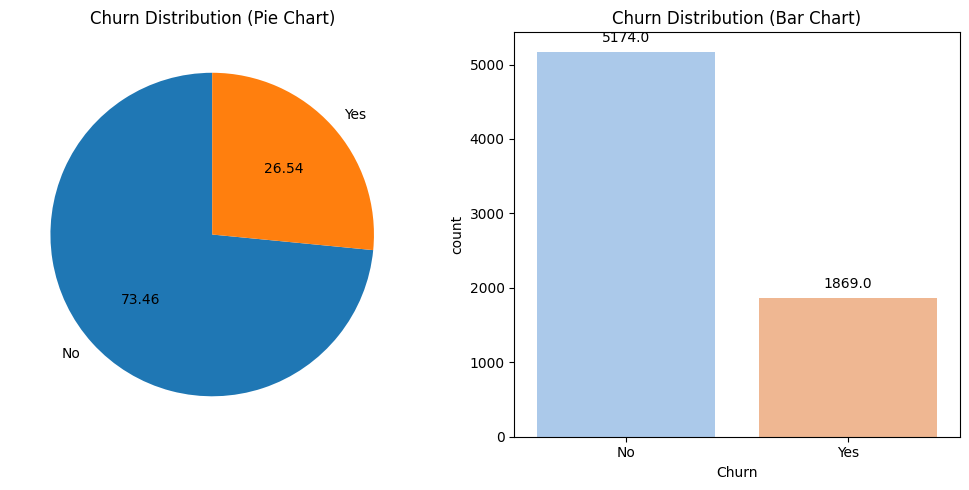

In [484]:
# Data
churn_counts = df['Churn'].value_counts()

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot Pie Chart
axes[0].pie(churn_counts, labels=churn_counts.index, autopct='%.2f', startangle=90)
axes[0].set_title('Churn Distribution (Pie Chart)')

# Plot Bar Chart
sns.countplot(x='Churn', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Churn Distribution (Bar Chart)')

# Add labels on the top of bars
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plots
plt.tight_layout()
plt.show()

**Insight**: Based on the pie chart above, data that does not churn is more dominant, namely 73.42%, while data for customers who do churn is 26.5%. This identifies imbalance data

## **How long have  been a customer?**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

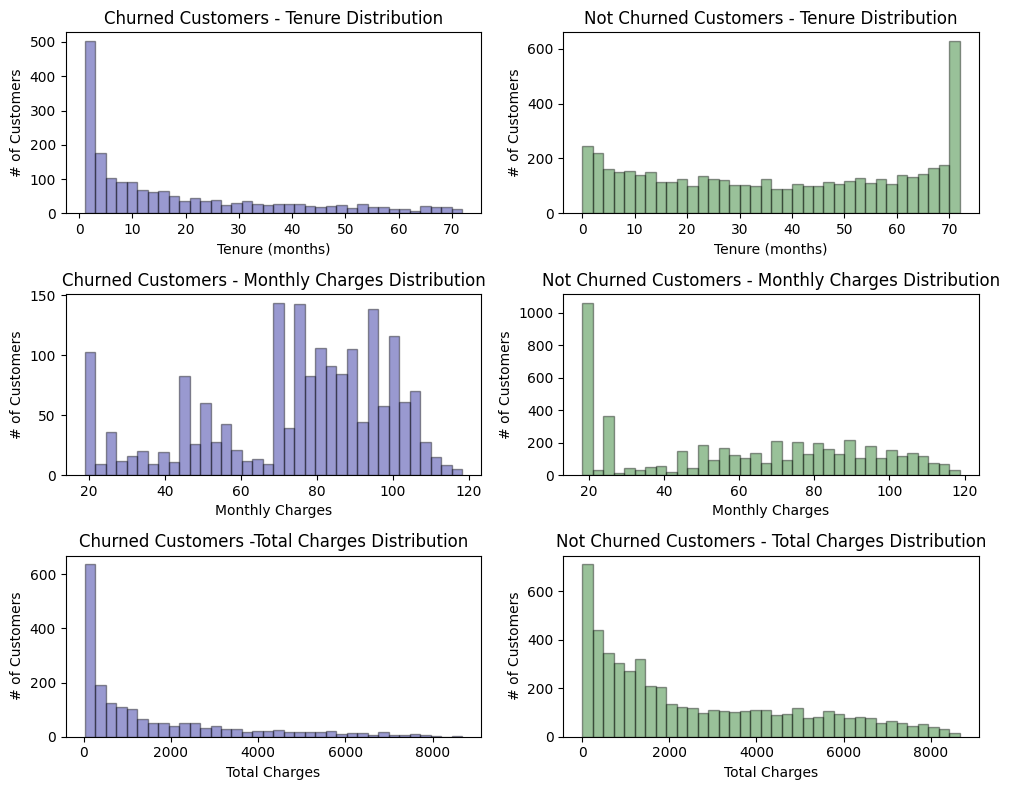

In [485]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Churned customers
churned_customers = df[df['Churn'] == 'Yes']

# Not churned customers
not_churned_customers = df[df['Churn'] == 'No']

# Plot for Churned customers - Tenure Distribution
ax_churned_tenure = sns.distplot(churned_customers['tenure'], hist=True, kde=False,
                                 bins=int(180/5), color='darkblue',
                                 hist_kws={'edgecolor': 'black'},
                                 ax=axes[0, 0])
ax_churned_tenure.set_ylabel('# of Customers')
ax_churned_tenure.set_xlabel('Tenure (months)')
ax_churned_tenure.set_title('Churned Customers - Tenure Distribution')

# Plot for Not Churned customers - Tenure Distribution
ax_not_churned_tenure = sns.distplot(not_churned_customers['tenure'], hist=True, kde=False,
                                     bins=int(180/5), color='darkgreen',
                                     hist_kws={'edgecolor': 'black'},
                                     ax=axes[0, 1])
ax_not_churned_tenure.set_ylabel('# of Customers')
ax_not_churned_tenure.set_xlabel('Tenure (months)')
ax_not_churned_tenure.set_title('Not Churned Customers - Tenure Distribution')

# Plot for Churned customers - Monthly Charges Distribution
ax_churned_monthly_charges = sns.distplot(churned_customers['MonthlyCharges'], hist=True, kde=False,
                                          bins=int(180/5), color='darkblue',
                                          hist_kws={'edgecolor': 'black'},
                                          ax=axes[1, 0])
ax_churned_monthly_charges.set_ylabel('# of Customers')
ax_churned_monthly_charges.set_xlabel('Monthly Charges')
ax_churned_monthly_charges.set_title('Churned Customers - Monthly Charges Distribution')

# Plot for Not Churned customers - Monthly Charges Distribution
ax_not_churned_monthly_charges = sns.distplot(not_churned_customers['MonthlyCharges'], hist=True, kde=False,
                                              bins=int(180/5), color='darkgreen',
                                              hist_kws={'edgecolor': 'black'},
                                              ax=axes[1, 1])
ax_not_churned_monthly_charges.set_ylabel('# of Customers')
ax_not_churned_monthly_charges.set_xlabel('Monthly Charges')
ax_not_churned_monthly_charges.set_title('Not Churned Customers - Monthly Charges Distribution')

# Plot for Churned customers - Total Charges Distribution
ax_churned_total_charges = sns.distplot(churned_customers['TotalCharges'], hist=True, kde=False,
                                          bins=int(180/5), color='darkblue',
                                          hist_kws={'edgecolor': 'black'},
                                          ax=axes[2, 0])
ax_churned_total_charges.set_ylabel('# of Customers')
ax_churned_total_charges.set_xlabel('Total Charges')
ax_churned_total_charges.set_title('Churned Customers -Total Charges Distribution')

# Plot for Not Churned customers - Total Charges Distribution
ax_not_churned_total_charges = sns.distplot(not_churned_customers['TotalCharges'], hist=True, kde=False,
                                              bins=int(180/5), color='darkgreen',
                                              hist_kws={'edgecolor': 'black'},
                                              ax=axes[2, 1])
ax_not_churned_total_charges.set_ylabel('# of Customers')
ax_not_churned_total_charges.set_xlabel('Total Charges')
ax_not_churned_total_charges.set_title('Not Churned Customers - Total Charges Distribution')

# Adjust layout
plt.tight_layout()

# Show plots
plt


- Tenure: From the graph plot above, it can be seen that the longer the tenure, the less likely to churn, conversely, those with less tenure tend to churn.
- Monthly Charges:
Customers who churn tend to have lower monthly charges, with significant peaks in the cost range of 20-30 and 70-90. On the other hand, customers who do not churn show a more even distribution across various charge amounts, but there is still a significant peak in the 20-30 cost range.
- Total Charges:
Both churned and non-churned customers are mostly concentrated at the lower end of the total charge distribution (below 2000). This indicates that the majority of customers tend to have lower total charges.
However, non-churned customers show a more gradual decline as total charges increase. This might suggest that customers who do not churn are more likely to stay, even as their total charges go up.

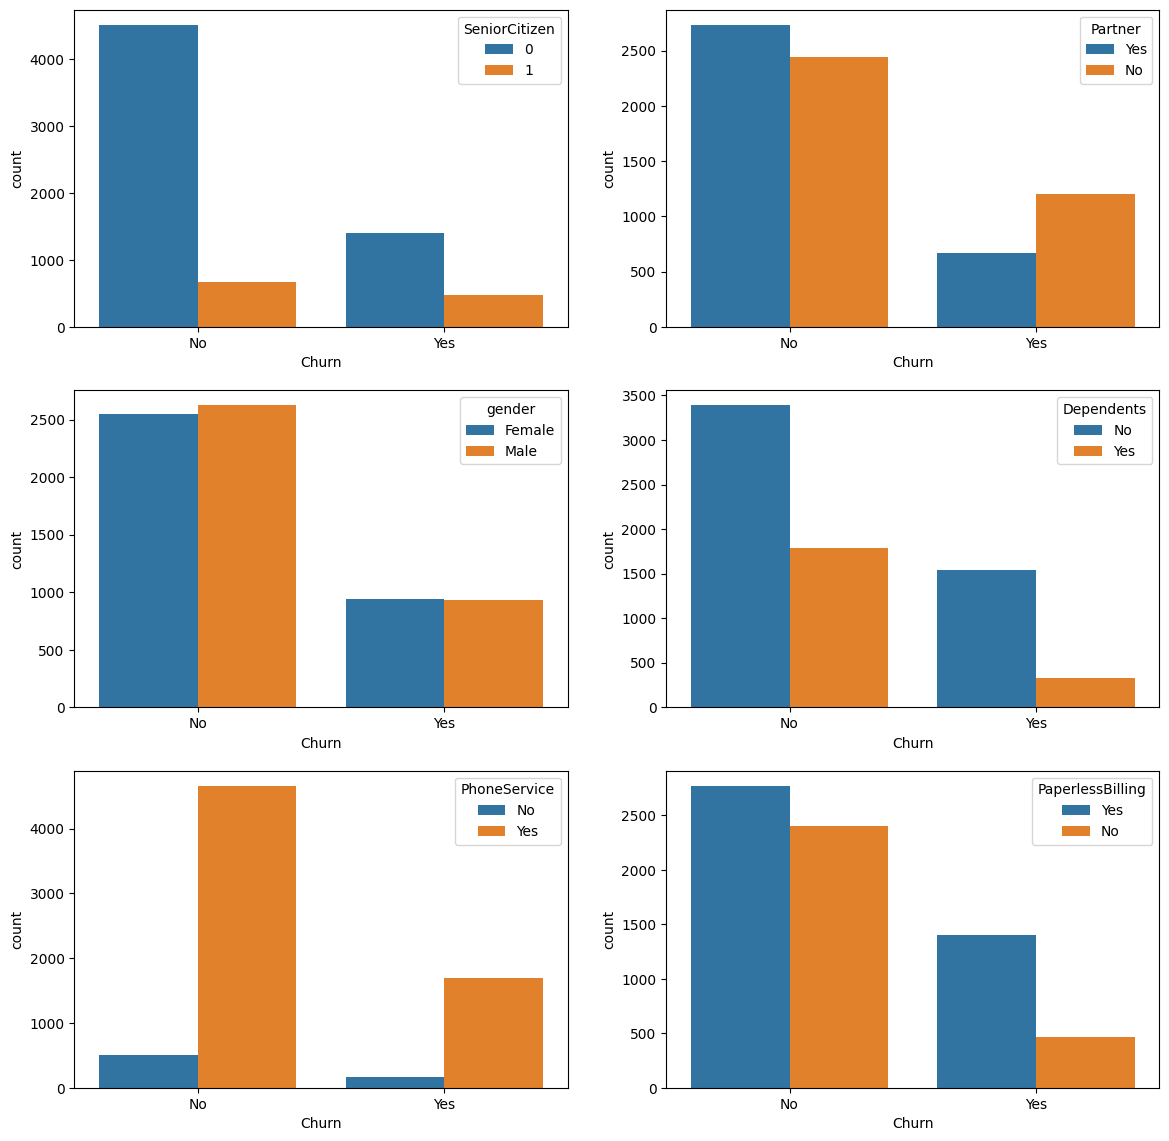

In [486]:
# membuat bar plot pada beberapa variabel kategory
fig,axs=plt.subplots(3,2, figsize=(14,14))
sns.countplot(x='Churn',hue='SeniorCitizen',data=df,ax=axs[0,0])
sns.countplot(x='Churn',hue='Partner',data=df,ax=axs[0,1])
sns.countplot(x='Churn',hue='gender',data=df,ax=axs[1,0])
sns.countplot(x='Churn',hue='Dependents',data=df,ax=axs[1,1])
sns.countplot(x='Churn',hue='PhoneService',data=df,ax=axs[2,0])
sns.countplot(x='Churn',hue='PaperlessBilling',data=df,ax=axs[2,1])
plt.show()

- Gender: There is no significant influence on churn based on gender.
- Partner: Customers with partners tend to have lower churn rates, while customers without partners are more dominant among those who churn.
- SeniorCitizen: Among long-term customers, the churn and non-churn numbers are relatively close. However, it is still dominant that long-term customers tend not to churn. This highlights the importance of retaining long-term customers by offering incentives such as loyalty programs. Meanwhile, new customers are more likely to extend their services.
- Dependents: The majority of customers with dependents do not churn.
- PhoneService: Customers who do not churn are dominated by those who receive phone services from the company. However, churn customers are also dominated by those who receive phone services from the company.
- PaperlessBilling: Customers who do not churn are dominated by those using paperless billing. However, customers without paperless billing also tend not to churn. Despite this, the dominance remains with customers using paperless billing.

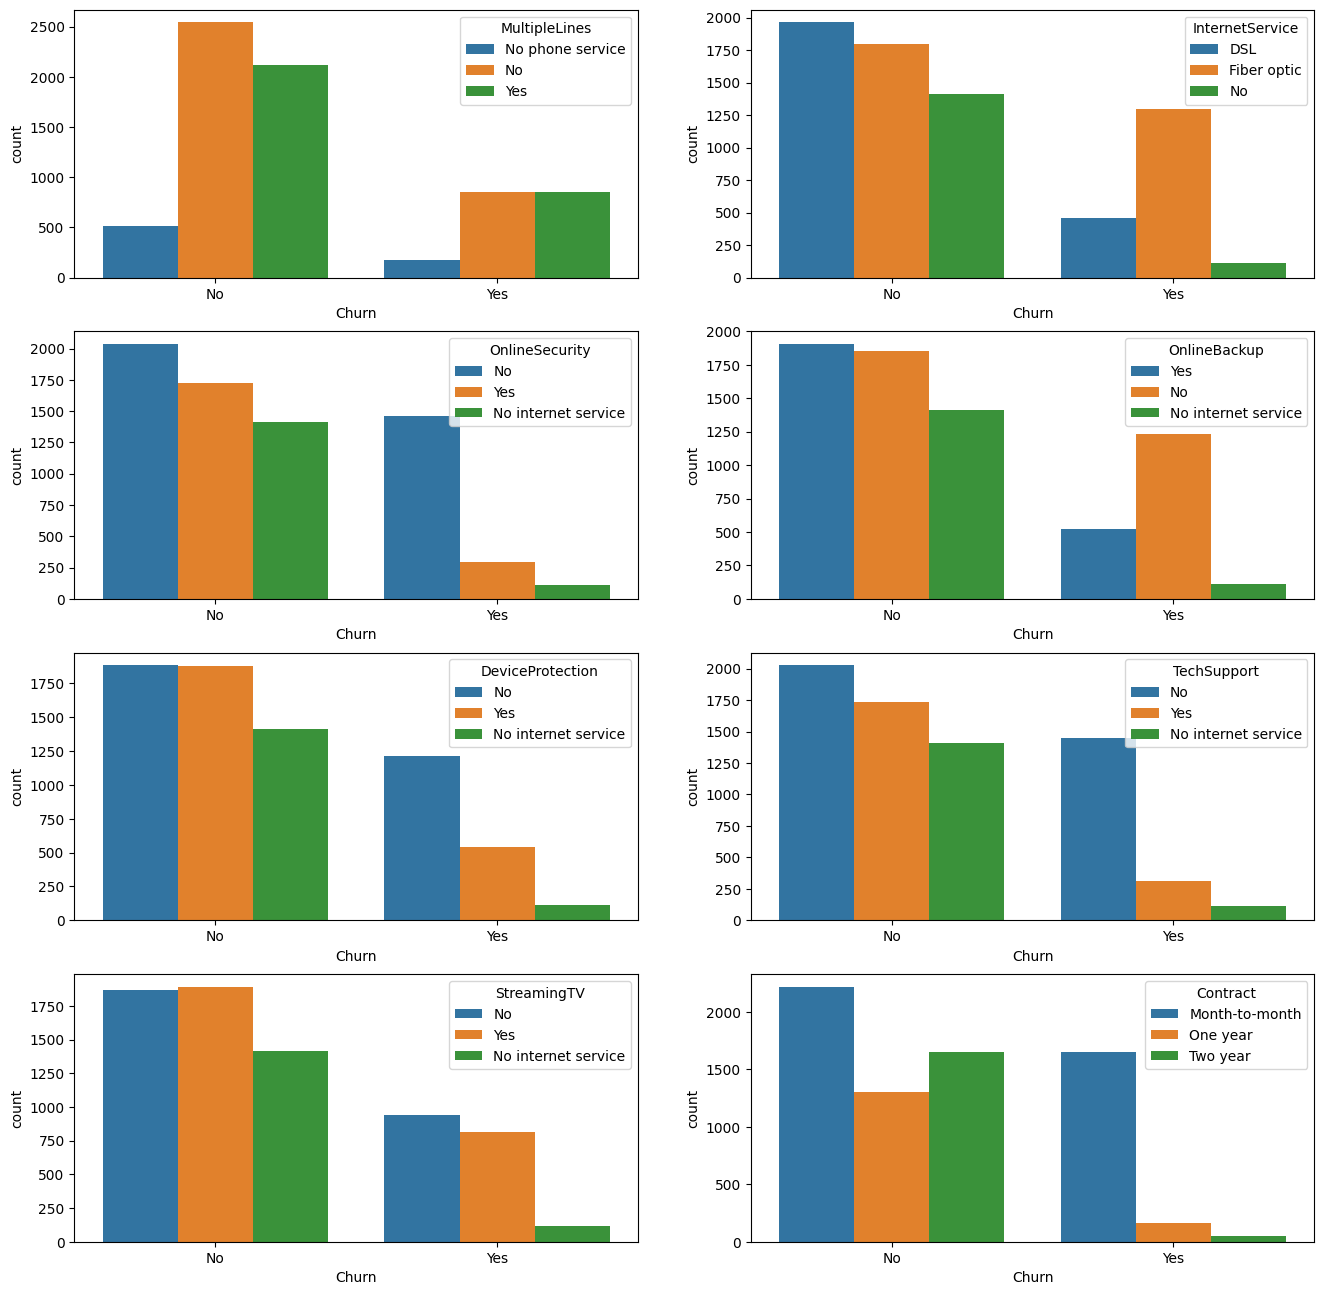

In [487]:
# membuat bar plot pada beberapa variabel kategory
fig,axs=plt.subplots(4,2, figsize=(16,16))
sns.countplot(x='Churn',hue='MultipleLines',data=df,ax=axs[0,0])
sns.countplot(x='Churn',hue='InternetService',data=df,ax=axs[0,1])
sns.countplot(x='Churn',hue='OnlineSecurity',data=df,ax=axs[1,0])
sns.countplot(x='Churn',hue='OnlineBackup',data=df,ax=axs[1,1])
sns.countplot(x='Churn',hue='DeviceProtection',data=df,ax=axs[2,0])
sns.countplot(x='Churn',hue='TechSupport',data=df,ax=axs[2,1])
sns.countplot(x='Churn',hue='StreamingTV',data=df,ax=axs[3,0])
sns.countplot(x='Churn',hue='Contract',data=df,ax=axs[3,1])
plt.show()

- Multiple Lines: Customers who do not churn are dominated by those with a single line, while the proportion of churned customers is roughly the same for both single and multiple lines.

- Internet Service: The majority of churned customers use fiber optic internet service. This raises concerns about the fiber optic internet service that might be contributing to customer churn.

- Online Security: Most churned customers do not use online security services. However, the majority of non-churned customers also do not use online security.

- Tech Support: A significant portion of churned customers does not have tech support. Similar to online security, the majority of non-churned customers also lack tech support.

- Online Backup: Churned customers predominantly do not use online backup services. However, the majority of non-churned customers also do not use online backup.

- Device Protection: The majority of churned customers do not have device protection. Interestingly, a similar pattern is observed among non-churned customers, indicating that having or not having device protection doesn't strongly correlate with churn.

- Streaming TV: Churned customers mostly do not have streaming TV services. However, the number of churned customers with streaming TV is still significant.

- Streaming Movie: Similar to streaming TV, most churned customers do not have streaming movie services. Yet, the number of churned customers with streaming movie services is noteworthy.

- Contract: The majority of churned customers have a month-to-month contract, indicating that customers with this type of contract are more likely to churn.

# v. Feature Engineering

## Check Cardinality

In [488]:
# # set colwidth hidher
pd.set_option('display.max_colwidth', None)

# Create a looping for unique values details
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

# Create into a dataframe
unique_val_df = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

# Show the dataframe
unique_val_df

,Column Name,Number of Unique,Unique Sample
0,customerID,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237-HQITU, 9305-CDSKC, 1452-KIOVK, 6713-OKOMC, 7892-POOKP, 6388-TABGU, 9763-GRSKD, 7469-LKBCI, 8091-TTVAX, 0280-XJGEX, 5129-JLPIS, 3655-SNQYZ, 8191-XWSZG, 9959-WOFKT, 4190-MFLUW, 4183-MYFRB, 8779-QRDMV, 1680-VDCWW, 1066-JKSGK, 3638-WEABW, 6322-HRPFA, 6865-JZNKO, 6467-CHFZW, 8665-UTDHZ, 5248-YGIJN, 8773-HHUOZ, 3841-NFECX, 4929-XIHVW, 6827-IEAUQ, 7310-EGVHZ, 3413-BMNZE, 6234-RAAPL, 6047-YHPVI, 6572-ADKRS, 5380-WJKOV, 8168-UQWWF, 8865-TNMNX, 9489-DEDVP, 9867-JCZSP, 4671-VJLCL, 4080-IIARD, 3714-NTNFO, 5948-UJZLF, 7760-OYPDY, 7639-LIAYI, 2954-PIBKO, 8012-SOUDQ, 9420-LOJKX, 6575-SUVOI, 7495-OOKFY, 4667-QONEA, 1658-BYGOY, 8769-KKTPH, 5067-XJQFU, 3957-SQXML, 5954-BDFSG, 0434-CSFON, 1215-FIGMP, 0526-SXDJP, 0557-ASKVU, 5698-BQJOH, 5122-CYFXA, 8627-ZYGSZ, 3410-YOQBQ, 3170-NMYVV, 7410-OIEDU, 2273-QCKXA, 0731-EBJQB, 1891-QRQSA, 8028-PNXHQ, 5630-AHZIL, 2673-CXQEU, 6416-JNVRK, 5590-ZSKRV, 0191-ZHSKZ, 3887-PBQAO, 5919-TMRGD, 8108-UXRQN, 9191-MYQKX, 9919-YLNNG, 0318-ZOPWS, 4445-ZJNMU, 4808-YNLEU, 1862-QRWPE, 2796-NNUFI, 3016-KSVCP, 4767-HZZHQ, 2424-WVHPL, 7233-PAHHL, 6067-NGCEU, 9848-JQJTX, 8637-XJIVR, 9803-FTJCG, 0278-YXOOG, 3212-KXOCR, 4598-XLKNJ, ...]"
1,gender,2,"[Female, Male]"
2,SeniorCitizen,2,"[0, 1]"
3,Partner,2,"[Yes, No]"
4,Dependents,2,"[No, Yes]"
5,tenure,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71, 21, 12, 30, 47, 72, 17, 27, 5, 46, 11, 70, 63, 43, 15, 60, 18, 66, 9, 3, 31, 50, 64, 56, 7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37, 36, 41, 6, 4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19, 54, 51, 26, 0, 39]"
6,PhoneService,2,"[No, Yes]"
7,MultipleLines,3,"[No phone service, No, Yes]"
8,InternetService,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,3,"[No, Yes, No internet service]"




*   The dataset exhibits low cardinality, and there are no redundant values

In [489]:
# change Churn type
df['Churn'].replace({'No':0,'Yes':1},inplace=True)

In [490]:
# drop customerID because it is not important in modelling
df.drop(columns='customerID',inplace=True)

## Correlation

In [491]:
cat_col=['gender','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen']
cat_num=['SeniorCitizen']
num_col=['MonthlyCharges', 'TotalCharges','tenure']

## Category

Check correlation wit chi Square

- H0: There is no association between the variables with churn columns
- H1: There is association between the variables with churn columns


Criteria testing:

Reject H0: p value < alpha (0.05)

We conclude that there is a significant relationship between the variables.

In [492]:
# Set the significance level (alpha)
alpha = 0.05

# Perform chi-squared test for each categorical column
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'chi2-statistic', 'p-value', 'is_correlated'])

for cat_column in cat_col:
    contingency_table = pd.crosstab(df[cat_column], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    is_correlated = 'Yes' if p < alpha else 'No'

    # Use pd.concat to concatenate the DataFrames
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'chi2-statistic': [chi2], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the chi-squared test results DataFrame for categorical columns
correlation_df_categorical

,categorical_column,chi2-statistic,p-value,is_correlated
0,gender,0.484083,4.865787e-01,No
1,Partner,158.733382,2.139911e-36,Yes
2,Dependents,189.129249,4.924922e-43,Yes
3,PhoneService,0.915033,3.387825e-01,No
4,MultipleLines,11.330441,3.464383e-03,Yes
5,InternetService,732.309590,9.571788e-160,Yes
6,OnlineSecurity,849.998968,2.661150e-185,Yes
7,OnlineBackup,601.812790,2.079759e-131,Yes
8,DeviceProtection,558.419369,5.505219e-122,Yes
9,TechSupport,828.197068,1.443084e-180,Yes


Because the chi-square test revealed significant correlations between churn and several nominal variables, we are now employing Kendall's Tau correlation to investigate the strength and direction of these correlations

In [493]:
# kendal tau correlation
cat=[]
kor=[]
for i in cat_col:
  corr,pval=kendalltau(df['Churn'],df[i])
  if corr > 0.1 or corr<-0.1:
    kor.append(corr)
    cat.append(i)

data_f = pd.DataFrame({'Category': cat, 'Kendall_Correlation': kor})
data_f


,Category,Kendall_Correlation
0,Partner,-0.150448
1,Dependents,-0.164221
2,OnlineSecurity,-0.288507
3,OnlineBackup,-0.192538
4,DeviceProtection,-0.176252
5,TechSupport,-0.281721
6,Contract,-0.386912
7,PaperlessBilling,0.191825
8,SeniorCitizen,0.150889


Based on the results above, it can be observed that there are 8 variables relatively high correlation with churn (greater than 0.1 or less than -0.1). The variable 'tenure' exhibits the highest correlation among them.

### Numeric

In [494]:
# Assuming X_train and y_train are your feature and target variables

# Initialize lists to store results
pearson_coeffs = []
spearman_coeffs = []
kendall_coeffs = []

p_pearson_values = []
p_spearman_values = []
p_kendall_values = []

interpretations_pearson = []
interpretations_spearman = []
interpretations_kendall = []

# Loop through numerical columns and calculate correlation coefficients
for col in num_col:
    # Pearson correlation
    pearson_coeff, p_pearson_value = pearsonr(df[col], df['Churn'])
    pearson_coeffs.append(pearson_coeff)
    p_pearson_values.append(p_pearson_value)

    # Interpret the results for Pearson
    if p_pearson_value < 0.05:
        if pearson_coeff > 0:
            interpretation = "Positive correlation"
        elif pearson_coeff < 0:
            interpretation = "Negative correlation"
        else:
            interpretation = "No correlation"
    else:
        interpretation = "Not statistically significant"

    interpretations_pearson.append(interpretation)

    # Spearman correlation
    spearman_coeff, p_spearman_value = spearmanr(df[col], df['Churn'])
    spearman_coeffs.append(spearman_coeff)
    p_spearman_values.append(p_spearman_value)

    # Interpret the results for Spearman
    if p_spearman_value < 0.05:
        if spearman_coeff > 0:
            interpretation = "Positive correlation"
        elif spearman_coeff < 0:
            interpretation = "Negative correlation"
        else:
            interpretation = "No correlation"
    else:
        interpretation = "Not statistically significant"

    interpretations_spearman.append(interpretation)


# Create DataFrames to store the results
correlation_results = pd.DataFrame({
    'Numerical Column': num_col,
    "Pearson Correlation Coefficient": pearson_coeffs,
    'P-Value (Pearson)': p_pearson_values,
    'Interpretation (Pearson)': interpretations_pearson,
    "Spearman Correlation Coefficient": spearman_coeffs,
    'P-Value (Spearman)': p_spearman_values,
    'Interpretation (Spearman)': interpretations_spearman,
})

# Show the correlation results DataFrame
correlation_results


,Numerical Column,Pearson Correlation Coefficient,P-Value (Pearson),Interpretation (Pearson),Spearman Correlation Coefficient,P-Value (Spearman),Interpretation (Spearman)
0,MonthlyCharges,0.193356,2.706646e-60,Positive correlation,0.184743,4.132386e-55,Positive correlation
1,TotalCharges,-0.198324,2.127212e-63,Negative correlation,-0.229955,3.549197e-85,Negative correlation
2,tenure,-0.352229,7.999058e-205,Negative correlation,-0.367062,1.404617e-223,Negative correlation


Based on the results above, it can be observed that all three variables show a relatively high correlation with churn (greater than 0.1 or less than -0.1). The variable 'tenure' exhibits the highest correlation among them.

## Check VIF

In [495]:
# definisi vif
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [496]:
df_new=df[['SeniorCitizen','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','MonthlyCharges','tenure','TotalCharges']]
for col in df_new.columns:
        df_new[col] = LabelEncoder().fit_transform(df_new[col])

calc_vif(df_new)


,variables,VIF
0,SeniorCitizen,1.335690
1,Partner,2.803940
2,Dependents,1.906543
3,OnlineSecurity,2.158729
4,OnlineBackup,2.365526
5,DeviceProtection,2.484572
6,TechSupport,2.313749
7,Contract,4.263250
8,PaperlessBilling,2.458889
9,MonthlyCharges,12.690495


The `tenure` and `TotalCharges` columns have a very high VIF, so they have the potential to have a high correlation with other variables. Next, a deletion will be made in the `TotalCharges` column

In [497]:
df_new.drop('TotalCharges',axis=1,inplace=True)

calc_vif(df_new)

,variables,VIF
0,SeniorCitizen,1.335292
1,Partner,2.802698
2,Dependents,1.906540
3,OnlineSecurity,2.145347
4,OnlineBackup,2.364578
5,DeviceProtection,2.481667
6,TechSupport,2.297254
7,Contract,4.012241
8,PaperlessBilling,2.453788
9,MonthlyCharges,3.966655


After deleting the `TotalCharges`, all columns have a small VIF

## Feature Splitting

In [498]:
X = df[['SeniorCitizen','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','MonthlyCharges','tenure']]
y = df['Churn']

Feature selection is by looking at high correlation to churn (above >= 0.1) or (below <= -0.1)


In [499]:
# splitting into train and test with a train data proportion of 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5634, 11)
Test Size :  (1409, 11)


## Handling Outlier

In [500]:
# Create function to search the skew value, upper and lower boundaries, and outlier flag
def outlier_analysis(data):

    # create the dataframe and empty lists
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # New list to indicate if a column has outliers

    # Loop for the columns
    for col in data.columns:
        col_name.append(col)

        # calculate skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Highly skewed upper and lower boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        # Moderately skewed
        elif skew_val >= 0.5 or skew_val <= -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        # Normally distributed
        else:
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
                # Append the upper and lower value
        upper.append(upper_boundary)
        lower.append(lower_boundary)

        # Check for outliers
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))

    # Add into the dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Add the has_outliers column

    return result

In [501]:
columns_check=X_train[['tenure','MonthlyCharges']]
outlier_analysis(columns_check)

,columns,skewness,upper boundary,lower boundary,has_outliers
0,tenure,0.226640,173.562478,-108.437522,False
1,MonthlyCharges,-0.225846,223.650426,-93.599574,False


There are no outlier data, so no outlier handling is carried out on the data. The skew of both variables is below 0.5, so the normalization carried out is a standard scaler

In [502]:
cat_col=['Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling']
num_col=['MonthlyCharges','tenure']
ordinal=['SeniorCitizen']

## Scaling dan Encoding

In [503]:
# create a pipeline that contains scaling and encoding
scaler =StandardScaler()
encoding =OneHotEncoder(handle_unknown='ignore')
preprocess = ColumnTransformer([('cat',encoding,cat_col),
                              ('num',scaler,num_col),
                                ('passthrough', 'passthrough', ordinal)])

preprocess

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Partner', 'Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'Contract',
                                  'PaperlessBilling']),
                                ('num', StandardScaler(),
                                 ['MonthlyCharges', 'tenure']),
                                ('passthrough', 'passthrough',
                                 ['SeniorCitizen'])])

The categorical variables in question are of nominal type; therefore, encoding is performed using one-hot encoding.

In [504]:
X_train_pro = preprocess.fit_transform(X_train)

### Handling Imbalance Data

In [505]:
# melakukan under sampling
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42)

X_res, y_res = cc.fit_resample(X_train_pro, y_train)
y_res.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

# Model Definition

**Random Forest Classifier:**
Description: Constructs multiple decision trees during training and merges them together to get a more accurate and stable prediction.

**Support Vector Machine (SVM) Classifier:**
Separates data points into different classes by finding the hyperplane that maximally separates them in a high-dimensional space.

**K-Nearest Neighbors (KNN) Classifier:**
Description: Classifies data points based on the majority class of their k-nearest neighbors in the feature space.

**Decision Tree Classifier:**
Creates a tree-like model of decisions based on the features of the data. It splits the data into subsets based on the most significant attribute at each node.

In [506]:
# Define the Random Forest Classifier with a random state
random_forest_model = RandomForestClassifier(n_estimators=100)

# Define the Support Vector Machine (SVM) Classifier with a random state
svm_model = SVC()

# Define the K-Nearest Neighbors (KNN) Classifier with a random state
knn_model = KNeighborsClassifier()

# Define the Decision Tree Classifier with a random state
decision_tree_model = DecisionTreeClassifier()

# Define the Gradient Boostong with a random state
gradient_boosting_model = GradientBoostingClassifier()

# Model Training

As stated in the problem statement, the primary objective of this project is to minimize the number of cases where the model fails to identify customers who are likely to churn. This objective corresponds to the Recall value.

A higher recall indicates that the model is correctly identifying more customers who are actually churning, aligning with ConnectTel's goal of proactive churn prediction to reduce customer attrition and increase retention. It is crucial to prioritize Recall while maintaining an acceptable level of precision to avoid excessive false negatives.

## Baseline

In [507]:
custom_recall = make_scorer(recall_score, pos_label=1)

In [508]:
# perform cross validation for each model
cv_svm_model = cross_val_score(svm_model, X_res, y_res, cv=3, scoring=custom_recall)
cv_rf_model = cross_val_score(random_forest_model, X_res, y_res, cv=3, scoring=custom_recall)
cv_knn_model = cross_val_score(knn_model, X_res, y_res, cv=3, scoring=custom_recall)
cv_dt_model = cross_val_score(decision_tree_model, X_res, y_res, cv=3, scoring=custom_recall)
cv_gbc_model = cross_val_score(gradient_boosting_model, X_res,y_res, cv=3, scoring=custom_recall)


In [509]:
# cross validation for each model
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_rf_model,cv_dt_model,cv_gbc_model],['knn_model','svm_model','rf_model','dt_model','gbc_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
recall - All - Cross Validation  :  [0.78915663 0.73547094 0.7751004 ]
recall - Mean - Cross Validation :  0.7665759899987391
recall - Std - Cross Validation  :  0.022730850963438028
recall - Range of Test-Set       :  0.743845139035301 - 0.7893068409621772
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.83534137 0.80160321 0.80522088]
recall - Mean - Cross Validation :  0.8140551518029365
recall - Std - Cross Validation  :  0.015123911881258653
recall - Range of Test-Set       :  0.7989312399216779 - 0.8291790636841951
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.78714859 0.76953908 0.79317269]
recall - Mean - Cross Validation :  0.783286787765625
recall - Std - Cross Validation  :  0.010027365022512464
recall - Range of Test-Set       :  0.7732594227431125 - 0.7933141527881374
--------------------------------------------------
dt_model
recall - All - Cross Validation  :

Dari beberapa model di atas terbaik adalah gradient boosting

## Hyperparameter

In [510]:
# Defining parameters
import scipy.stats as stats
parameters = {
    'gb__n_estimators': stats.randint(30, 101),
    'gb__max_depth': stats.randint(3, 8),
    'gb__learning_rate': stats.uniform(0.01, 0.2 - 0.01),
    'gb__subsample': [0.8, 1.0],
    'gb__min_samples_split': stats.randint(2, 11),
    'gb__min_samples_leaf': stats.randint(1, 5),
    'gb__max_features': ['auto', 'sqrt', 'log2']
}

In [511]:
gb_classifier = GradientBoostingClassifier()

# Define the parameter distribution for RandomizedSearchCV
parameters = {
    'gb__n_estimators': stats.randint(30, 101),
    'gb__max_depth': stats.randint(3, 8),
    'gb__learning_rate': stats.uniform(0.01, 0.2 - 0.01),
    'gb__subsample': [0.8, 1.0],
    'gb__min_samples_split': stats.randint(2, 11),
    'gb__min_samples_leaf': stats.randint(1, 5),
    'gb__max_features': ['auto', 'sqrt', 'log2']
}

# Create the pipeline with GradientBoostingClassifier
final_pipe = Pipeline([('gb', gb_classifier)])

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    final_pipe,
    param_distributions=parameters,
    n_iter=10,
    scoring=custom_recall,
    cv=3,
    n_jobs=-1
)

# Fit the random search to the data
random_search.fit(X_res, y_res)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Print the results
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best Parameters: {'gb__learning_rate': 0.18123463830776376, 'gb__max_depth': 3, 'gb__max_features': 'log2', 'gb__min_samples_leaf': 2, 'gb__min_samples_split': 7, 'gb__n_estimators': 65, 'gb__subsample': 0.8}
Best Estimator: Pipeline(steps=[('gb',
                 GradientBoostingClassifier(learning_rate=0.18123463830776376,
                                            max_features='log2',
                                            min_samples_leaf=2,
                                            min_samples_split=7,
                                            n_estimators=65, subsample=0.8))])


In [512]:
random_search.best_score_

0.8401407902820367

Because the recall score after hyperparameter tuning is better, the gradient boosting model that has been hyperparameterized will be used


# Model Evaluation

recall :  0.8615384615384616 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      1495
           1       0.80      0.86      0.83      1495

    accuracy                           0.83      2990
   macro avg       0.83      0.83      0.83      2990
weighted avg       0.83      0.83      0.83      2990
 

Confusion Matrix      :


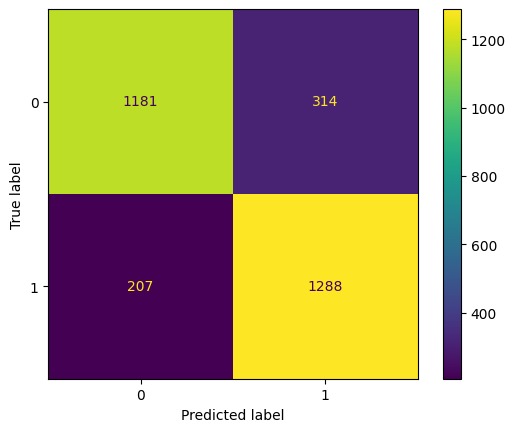

In [513]:
# Check Performance Model against Train-Set

y_pred_train = best_estimator.predict(X_res)

print('recall : ', recall_score(y_res, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_res, y_pred_train), '\n')
print('Confusion Matrix      :')
cm = confusion_matrix(y_res, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [514]:
X_test_pro = preprocess.transform(X_test)

recall - Test Set   :  0.8529411764705882 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.67      0.78      1035
           1       0.48      0.85      0.62       374

    accuracy                           0.72      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.81      0.72      0.73      1409
 

Confusion Matrix      : 


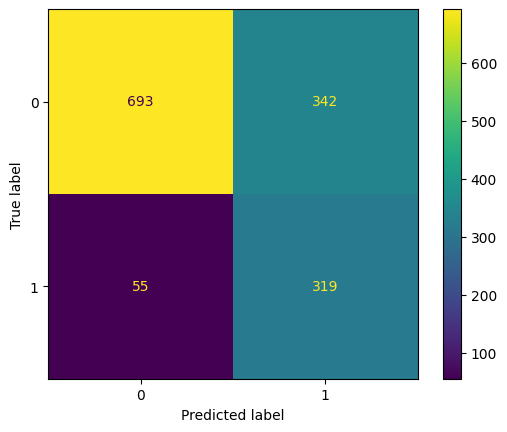

In [515]:
# Check Performance Model against Test-Set

y_pred_test = best_estimator.predict(X_test_pro)

print('recall - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : ')
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

**High Recall Scores:**

Model achieves a recall score of 0.86 on training and 0.85 on testing, indicating strong identification of customers likely to churn.

**Primary Focus on Recall:**

Emphasis on recall aligns with the goal of minimizing the risk of overlooking actual churn cases (false negatives).

**Precision and Recall Balance:**

Recognition of the need to balance precision and recall, with current concerns about a low precision of 0.48 for non-churn predictions, suggesting potential overfitting.

**Next Steps:**

Urgency for further evaluation, feature exploration, and hyperparameter tuning to enhance both precision and recall.
Continuous monitoring and refinement are crucial for real-world applicability.

In [516]:
onehot_feature_names = preprocess.named_transformers_['cat'].get_feature_names_out(cat_col)

In [517]:
# Assuming 'MonthlyCharges', 'tenure', and 'SeniorCitizen' are additional features
additional_features = np.array(['MonthlyCharges', 'tenure', 'SeniorCitizen'])

# Concatenate the existing onehot_feature_names array with additional features
onehot_feature_names = np.concatenate([onehot_feature_names, additional_features])


## Feature Selection


Feature importances provide insights into which features have the most influence on the model's predictions. This information is valuable for tasks such as feature selection, gaining a better understanding of the model's behavior, and identifying key factors that drive the model's decision-making process.

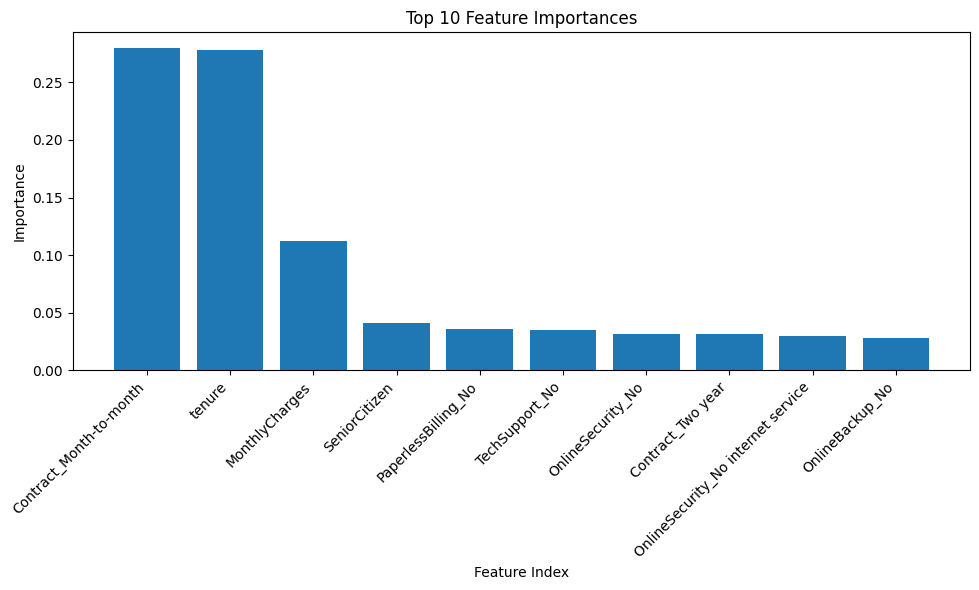

In [518]:
# Accessing the best model after RandomizedSearchCV
best_model = random_search.best_estimator_

# Find the first estimator in the pipeline
for step_name, step_process in best_model.named_steps.items():
    if hasattr(step_process, 'feature_importances_'):
        feature_importance = step_process.feature_importances_
        break

# Get the top 10 feature indices and importances
top_10_indices = feature_importance.argsort()[-10:][::-1]
top_10_importance = feature_importance[top_10_indices]

# Get the corresponding feature names
top_10_feature_names = onehot_feature_names[top_10_indices]

# Create a bar chart with the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_importance)), top_10_importance)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.xticks(range(len(top_10_importance)), labels=top_10_feature_names, rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 5 Feature that important to model are
- `Contract Month to Month`
- `Tenure`
- `MonthlyCharges`
- `Senior Citizen`
- `PaperlessBilling_No`

# Model Saving

In [519]:
# create a combined preprocess pipeline with the best model
final_model=Pipeline([('proses',preprocess),('model',best_estimator)])

In [520]:
final_model

Pipeline(steps=[('proses',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Partner', 'Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('num', StandardScaler(),
                                                  ['MonthlyCharges', 'tenure']),
                                                 ('passthrough', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('model',
                 Pipeline(steps=[('gb',
                                  GradientBoostingClassifier(learning_rate=0.18123463830776376,
                                                             max_features='log2',
                                                             min_samples_leaf=2,
                                                             min_samples_split=7,
                                                             n_estimators=65,
                                                             subsample=0.8))]))])

In [521]:
# saves functions to .pkl format
with open('final_model.pkl', 'wb') as file_1:
  pickle.dump(final_model, file_1)

# Analysis

## False Negatif

In [522]:
# Concate test set with y_test_pred to analyze the false negative
X_test['y_test'] = y_test
X_test['y_test_pred'] = y_pred_test

# Query only the False Negative
false_negatif = (X_test['y_test'] == 1) & (X_test['y_test_pred'] == 0)
fn_df = X_test[false_negatif]

In [523]:
# Analyze the categorical columns
fn_df.describe(include='object')

,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling
count,55,55,55,55,55,55,55,55
unique,2,2,3,3,3,3,3,2
top,Yes,No,Yes,Yes,No,No,Month-to-month,Yes
freq,31,41,25,23,24,23,24,36


In [524]:
# Analyze numerical columns
fn_df.drop(columns=['y_test','y_test_pred']).describe().loc[['mean', '50%', '25%', '75%'], :]

,SeniorCitizen,MonthlyCharges,tenure
mean,0.236364,67.297273,42.381818
50%,0.000000,65.250000,45.000000
25%,0.000000,47.350000,23.500000
75%,0.000000,94.000000,59.500000



The model exhibits weakness in identifying churn customers when the following characteristics are present:

- The customer does have onlinebackup.
- The customer is on a one-year contract.
- Monthly charges fall within the range of 74 to 93  month.
- The tenure of the customer is between 43 to 47 months.

## False Positif

In [525]:
# Query only the False Negative
false_positif = (X_test['y_test'] == 0) & (X_test['y_test_pred'] == 1)
fp_df = X_test[false_positif]

In [526]:
# Analyze the categorical columns
fp_df.describe(include='object')

,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling
count,342,342,342,342,342,342,342,342
unique,2,2,3,3,3,3,2,2
top,No,No,No,No,No,No,Month-to-month,Yes
freq,226,285,238,200,204,255,318,220


In [527]:
# Analyze numerical columns
fp_df.drop(columns=['y_test','y_test_pred']).describe().loc[['mean', '50%', '25%', '75%'], :]

,SeniorCitizen,MonthlyCharges,tenure
mean,0.190058,69.217836,19.766082
50%,0.000000,74.625000,13.000000
25%,0.000000,49.250000,3.250000
75%,0.000000,92.937500,29.000000


the model shows a weakness in identifying non-churn customers when the following characteristics are present:

- The customer does not have online backup.
- The customer is on a month-to-month contract.
- Monthly charges fall within the range of 66 to 70 per month.
- The tenure of the customer is between 13 to 17 months.

# Conclusion

As a data scientist at ConnectTel, I successfully developed a predictive model with a focus on minimizing false predictions for customers who are likely to churn.

The GradientBoosting model, after tuning and feature selection, showed the best overall performance with a recall score of 86%.However, the model exhibits weaknesses in predicting customers who should not churn. Significant variables in this model include contract month-to-month, tenure, monthly charges, senior citizen, and paperless billing.

The model can be further enhanced to improve precision by incorporating additional features. Additionally, addressing class imbalance can involve trying alternative methods such as SMOTENC. Exploring different ensemble models, such as XGBoost, may provide diversity and improve overall performance. Lastly, implementing regularization techniques can help manage overfitting and contribute to precision improvement.

# Recomendation to Business

Establish real-time churn alerts based on the predictive model to notify your team efficiently when a customer is at risk of churning. This allows quick intervention for customer retention. Exercise caution, especially in cases of predicted false negatives, as inaccuracies may occur. Regularly review and refine the alert system for improved accuracy and relevance in real-world scenarios.

**Contract Month-to-Month**:

Offer incentives or special promotions to encourage customers to switch from month-to-month contracts to long-term contracts. This can improve customer retention.

**Tenure:**

Introduce loyalty programs or exclusive offers for customers who have subscribed for a specific duration. Such efforts can enhance loyalty among long-term subscribers.

**Monthly Charges:**

Consider adjusting pricing or offering service packages to meet customer needs and maintain affordable monthly rates. This can help alleviate financial pressure on customers.

**Senior Citizen:**

Specifically for senior customers, offer additional services or features tailored to their needs. Pay attention to the preferences and comfort of senior customers in communication and interaction with services.

**Paperless Billing_No:**

Educate customers on the benefits and convenience of using paperless billing. Provide incentives or special discounts for customers switching to paperless billing methods.